Phase 4 Project - Kaggle Competition "Natural Language Processing with Disaster Tweets"

## Business Problem

Data has been accumulated from a number of tweets, some of which are about disasters, some of which are not. By creating a model for Natural Language Processing (NLP), we can predict whether or not a given tweet is about a real disaster or not. This can benefit companies who wish to monitor twitter in the event of an emergency.

## Data Understanding

Necessary imports:


In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize

import numpy as np 
import nltk
np.random.seed(42)
import seaborn as sns
import re

import pandas as pd 
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

### Data Exploration:

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [6]:
# Example of what is NOT a disaster tweet:
train_df[train_df["target"] == 0]["text"].values[1]

'I love fruits'

In [7]:
# Example of what IS a disaster tweet:
train_df[train_df["target"] == 1]["text"].values[1]

'Forest fire near La Ronge Sask. Canada'

In [8]:
# Explore other features
# word frequencies for keyword column in 1 vs 0

In [9]:
train_df["keyword"].value_counts()

fatalities               45
armageddon               42
deluge                   42
damage                   41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

###### Visualizing the top 10 keywords in both train_df and test_df to see if we notice any trends:

In [10]:
top_train_keywords = train_df['keyword'].value_counts()[:10].sort_values(ascending=False).reset_index()
top_train_keywords

,index,keyword
0,fatalities,45
1,deluge,42
2,armageddon,42
3,harm,41
4,sinking,41
5,body%20bags,41
6,damage,41
7,evacuate,40
8,fear,40
9,twister,40


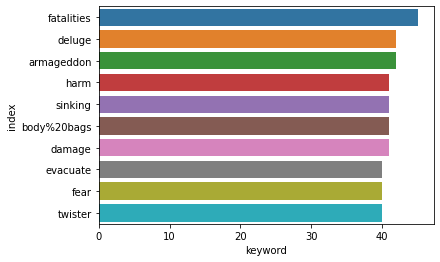

In [11]:
sns.barplot(y=top_train_keywords['index'], x=top_train_keywords['keyword']);

In [12]:
top_test_keywords = test_df['keyword'].value_counts()[:10].sort_values(ascending=False).reset_index()
top_test_keywords

,index,keyword
0,deluged,23
1,rubble,22
2,demolished,22
3,snowstorm,21
4,sirens,21
5,annihilation,21
6,seismic,21
7,first%20responders,21
8,obliteration,21
9,survivors,20


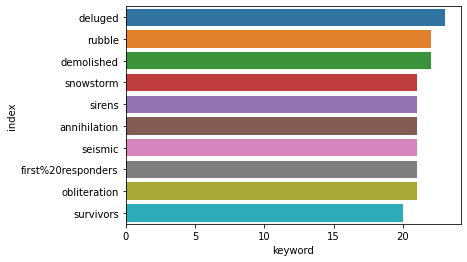

In [13]:
sns.barplot(y=top_test_keywords['index'], x=top_test_keywords['keyword']);

###### Visualizing what proportion of the training data are disaster tweets and non-disaster tweets

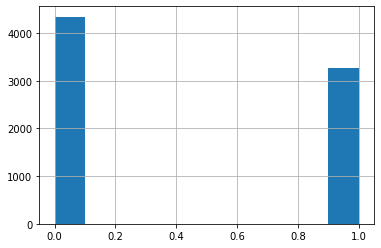

In [14]:
train_df['target'].hist();

###### Visualizing the top 10 keywords for the train_df for each target value:

In [15]:
disaster_tweets = train_df[train_df['target']==1]

other_tweets = train_df[train_df['target']==0]

In [16]:
other_tweets

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0
7587,10841,NaN,NaN,Sirens everywhere!,0


In [17]:
top_dis_keywords = disaster_tweets['keyword'].value_counts()[:10].sort_values(ascending=False).reset_index()
top_dis_keywords

,index,keyword
0,wreckage,39
1,outbreak,39
2,derailment,39
3,debris,37
4,oil%20spill,37
5,typhoon,37
6,suicide%20bomb,32
7,suicide%20bombing,32
8,evacuated,32
9,rescuers,32


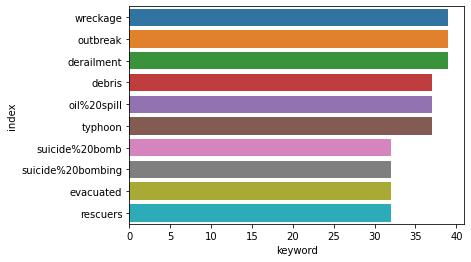

In [18]:
sns.barplot(y=top_dis_keywords['index'], x=top_dis_keywords['keyword']);

In [19]:
top_other_keywords = other_tweets['keyword'].value_counts()[:10].sort_values(ascending=False).reset_index()
top_other_keywords

,index,keyword
0,body%20bags,40
1,armageddon,37
2,harm,37
3,wrecked,36
4,deluge,36
5,ruin,36
6,twister,35
7,fear,35
8,explode,35
9,siren,35


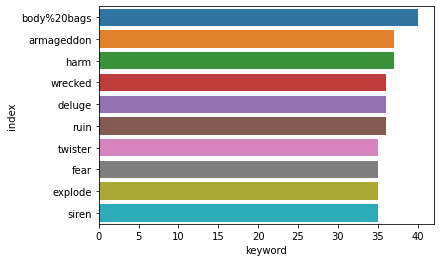

In [20]:
sns.barplot(y=top_other_keywords['index'], x=top_other_keywords['keyword']);

In [21]:
from nltk import FreqDist

train_freq_dist = FreqDist(train_df["keyword"].explode())
train_freq_dist



FreqDist({nan: 61, 'fatalities': 45, 'armageddon': 42, 'deluge': 42, 'body%20bags': 41, 'damage': 41, 'harm': 41, 'sinking': 41, 'collided': 40, 'evacuate': 40, ...})

## Data Preparation

In [22]:

from sklearn.model_selection import train_test_split 

X = train_df.text
y = train_df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [25]:
#import emoji
words = set(nltk.corpus.words.words())

for tweet in train_df['text']:    
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    #tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha()) #Remove non-english tweets (not 100% success)
    
    
    
    

### Laplace smoothing ?

###### Calculating the probabilities of disaster and non-disaster tweets in the training data:

In [27]:
P_disasters = len(disaster_tweets) /(len(disaster_tweets)+len(other_tweets))
P_non = len(other_tweets) /(len(other_tweets)+len(disaster_tweets))
print(P_disasters)
print(P_non)

0.4296597924602653
0.5703402075397347


In [28]:
# need set of unique tokens

In [29]:
bigrams = (tuple(nltk.bigrams(X_train,pad_left=True, pad_right=True)))

In [30]:
bigr = nltk.bigrams(X_train,pad_left=True, pad_right=True)

In [31]:
frequencyDist = nltk.ConditionalFreqDist(bigr)
frequencyDist

<ConditionalFreqDist with 5650 conditions>

In [32]:
# laplace smoothing = used to correct probabilities of words so there are no zeroes
#categories will be 1 and 0
def vocab_maker(category):
    vocab_category = set()
    
    for tweet in category:
        words = tweet.split()
        for word in words:
            vocab_category.add(word)
    return vocab_category

In [33]:
voc_dis = vocab_maker(disaster_tweets['text'])
voc_non = vocab_maker(other_tweets['text'])

In [34]:
voc_all = voc_dis.union(voc_non)
voc_all

{'21',
 'Ns',
 'primarily...',
 '@traplord_29',
 'http://t.co/Ch6E7vTATR',
 'http://t.co/ct2JUtvYTg',
 'CHONCE',
 '#AdiosSuperBacterias',
 'Force...',
 'ET',
 'veteran',
 'INFO',
 'trickshot',
 'http://t.co/2o7Eva1cOe',
 'blight...',
 "Night'",
 '#spain',
 'Shadowflame',
 '($)',
 'Half',
 'Ending',
 'proper',
 'DROID',
 'ETO',
 '5.139055',
 'http://t.co/mFSw0tYstA',
 'efforts',
 'You)',
 'seatbelt!!!...',
 'http://t.co/itZzKWfhG5',
 'paulista',
 'DOWN',
 'Wed...',
 'http://t.co/R33nCvjovC',
 '(415)',
 'http://t.co/vVE3UsesGf',
 'body-bagging',
 '#US?',
 'occupants',
 '4:30',
 'hostage!',
 '#iJETalerts',
 'interactions.',
 'scum',
 'y',
 'harbor',
 'roller.',
 'burned:',
 'RT?',
 'standard',
 'http://t.co/1RrEO2jG9u',
 '@accionempresa',
 'http://t.co/3bwWNLsxhB',
 "bomb'",
 '#CNN',
 '@LindaSOCVAT',
 'knew.',
 'time)',
 'http://t.co/5FcJVMl520',
 'SlideShare',
 '1976.',
 '2.4RegionåÊåÊNEAR',
 'remixes.',
 'http://t.co/7IEiZ619h0',
 'http://t.co/2kdq56xTWs',
 '(Black)',
 'Nearly',
 'Overl

In [35]:
from nltk import *

train_df['text'].vocab()

AttributeError: 'Series' object has no attribute 'vocab'

In [42]:
total_vocab_count = len(voc_all)
total_dis_count = len(voc_dis)
total_non_count = len(voc_non)

In [43]:
print(total_vocab_count, total_dis_count, total_non_count)

31924 16150 20560


In [44]:
frequencyDist = nltk.ConditionalFreqDist()

In [45]:
probabilityDist = nltk.ConditionalProbDist(frequencyDist, nltk.LaplaceProbDist, bins=frequencyDist.N())
probabilityDist

<ConditionalProbDist with 0 conditions>

In [46]:
#Clean keywords for better idea of trends
def clean_keywords(keyword):
    cleaned = re.sub(r'%20', ' ', keyword)
    return cleaned
def remove_accents(keyword):
    cleaned = unidecode.unidecode(keyword)
    return cleaned
def remove_punctuation(keyword):
    cleaned = re.sub(r"[!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n -' ]"," ",keyword)
    return cleaned
#train_df['keyword'].apply(clean_keywords)

In [47]:
X_train

5151    @dicehateme @PuppyShogun This makes sense. Pap...
6351    '@CatoInstitute: The causes of federal failure...
3443    Well as I was chaning an iPad screen it fuckin...
7164    the war on drugs has turned the U.S. into a WA...
7037    Obama Declares Disaster for Typhoon-Devastated...
                              ...                        
5226    @Eganator2000 There aren't many Obliteration s...
5390    just had a panic attack bc I don't have enough...
860     Omron HEM-712C Automatic Blood Pressure Monito...
7603    Officials say a quarantine is in place at an A...
7270    I moved to England five years ago today. What ...
Name: text, Length: 5709, dtype: object

In [48]:
train_sample = X_train.iloc[1]
train_sample

"'@CatoInstitute: The causes of federal failure are deeply structural and they will not be easily solved: http://t.co/H2XcaX4jbU'"

In [49]:
#tokenize the cleaned tweets data:
from nltk.tokenize import word_tokenize
tokenized_sample_tweet = word_tokenize(train_sample)
tokenized_sample_tweet

["'",
 '@',
 'CatoInstitute',
 ':',
 'The',
 'causes',
 'of',
 'federal',
 'failure',
 'are',
 'deeply',
 'structural',
 'and',
 'they',
 'will',
 'not',
 'be',
 'easily',
 'solved',
 ':',
 'http',
 ':',
 '//t.co/H2XcaX4jbU',
 "'"]

In [50]:
# Tokenizing the data:
from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)

X_train_tokenized = X_train.copy()
X_test_tokenized = X_test.copy()
X_train_tokenized = X_train.apply(tokenizer.tokenize)
X_test_tokenized = X_test.apply(tokenizer.tokenize)


In [51]:
X_train

5151    @dicehateme @PuppyShogun This makes sense. Pap...
6351    '@CatoInstitute: The causes of federal failure...
3443    Well as I was chaning an iPad screen it fuckin...
7164    the war on drugs has turned the U.S. into a WA...
7037    Obama Declares Disaster for Typhoon-Devastated...
                              ...                        
5226    @Eganator2000 There aren't many Obliteration s...
5390    just had a panic attack bc I don't have enough...
860     Omron HEM-712C Automatic Blood Pressure Monito...
7603    Officials say a quarantine is in place at an A...
7270    I moved to England five years ago today. What ...
Name: text, Length: 5709, dtype: object

In [52]:
from nltk import FreqDist

train_df["text_tokenized"] = train_df["text"].apply(tokenizer.tokenize)
test_df["text_tokenized"] = test_df["text"].apply(tokenizer.tokenize)

train_df["text_tokenized"].explode()
test_df["text_tokenized"].explode()

0            Just
0        happened
0        terrible
0             car
0           crash
          ...    
3262          its
3262    Municipal
3262    Emergency
3262         Plan
3262     yycstorm
Name: text_tokenized, Length: 50940, dtype: object

In [53]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def visualize_top_10(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)
    
#visualize_top_10(example_freq_dist, "Top 10 Word Frequency for Example Tokens")


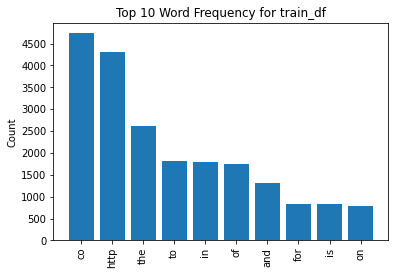

In [54]:
train_freq_dist = FreqDist(train_df["text_tokenized"].explode())
visualize_top_10(train_freq_dist, "Top 10 Word Frequency for train_df")

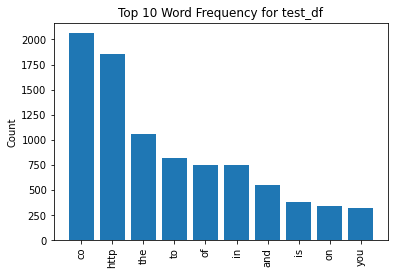

In [55]:
test_freq_dist = FreqDist(test_df["text_tokenized"].explode())
visualize_top_10(test_freq_dist, "Top 10 Word Frequency for test_df")

In [56]:
# Is this cell necessary?

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10)
#max_features=None
X_train_vectorized = tfidf.fit_transform(X_train)
X_test_vectorized = tfidf.transform(X_test)

# Which do I use?? The whole train_df or just X_train?

train_df_vectorized = tfidf.fit_transform(train_df)
test_df_vectorized = tfidf.transform(test_df)

pd.DataFrame.sparse.from_spmatrix(train_df_vectorized, columns=tfidf.get_feature_names())

,id,keyword,location,target,text,text_tokenized
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
X_train_tokenized

5151    [dicehateme, PuppyShogun, This, makes, sense, ...
6351    [CatoInstitute, The, causes, of, federal, fail...
3443    [Well, as, was, chaning, an, iPad, screen, it,...
7164    [the, war, on, drugs, has, turned, the, into, ...
7037    [Obama, Declares, Disaster, for, Typhoon, Deva...
                              ...                        
5226    [Eganator2000, There, aren, many, Obliteration...
5390    [just, had, panic, attack, bc, don, have, enou...
860     [Omron, HEM, 712C, Automatic, Blood, Pressure,...
7603    [Officials, say, quarantine, is, in, place, at...
7270    [moved, to, England, five, years, ago, today, ...
Name: text, Length: 5709, dtype: object

In [58]:
X_train_tokenized.iloc[70][:20]

['Madhya',
 'Pradesh',
 'Train',
 'Derailment',
 'Village',
 'Youth',
 'Saved',
 'Many',
 'Lives']

###### Word Vectorization

In [59]:
# first try count vectorization, then tf-idf ?
# Creating a 'bag of words'
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(max_features=10)


In [60]:
X_train_count_vectorized = count_vec.fit_transform(X_train)
X_test_count_vectorized = count_vec.transform(X_test)

pd.DataFrame.sparse.from_spmatrix(X_train_count_vectorized, columns=count_vec.get_feature_names())

,and,co,for,http,in,is,of,the,to,you
0,1,0,0,0,0,0,0,0,1,0
1,1,1,0,1,0,0,1,1,0,0
2,1,0,0,0,0,1,0,1,1,0
3,0,0,0,0,0,0,0,2,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5704,0,0,0,0,0,0,0,0,1,0
5705,1,0,1,0,0,0,0,1,1,0
5706,1,2,0,2,0,0,0,0,0,0
5707,0,1,0,1,1,1,0,0,0,0


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10, tokenizer=word_tokenize)


X_train_vectorized1 = tfidf.fit_transform(X_train)

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized1, columns=tfidf.get_feature_names())

,#,.,:,?,@,a,http,in,the,to
0,0.0,0.660024,0.000000,0.0,0.660956,0.000000,0.000000,0.000000,0.000000,0.357079
1,0.0,0.000000,0.792802,0.0,0.391163,0.000000,0.294835,0.000000,0.362669,0.000000
2,0.0,0.746706,0.000000,0.0,0.000000,0.398839,0.000000,0.000000,0.346645,0.403974
3,0.0,0.422978,0.000000,0.0,0.000000,0.451852,0.000000,0.000000,0.785442,0.000000
4,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
5704,0.0,0.000000,0.417074,0.0,0.617344,0.000000,0.000000,0.000000,0.000000,0.667035
5705,0.0,0.000000,0.000000,0.0,0.000000,0.599619,0.000000,0.000000,0.521150,0.607338
5706,0.0,0.000000,0.667451,0.0,0.000000,0.000000,0.744654,0.000000,0.000000,0.000000
5707,0.0,0.000000,0.261405,0.0,0.000000,0.825513,0.291642,0.406374,0.000000,0.000000


###### Building a baseline model

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

baseline_model = Pipeline([('vect', CountVectorizer(tokenizer=word_tokenize)),
               ('clf', MultinomialNB()),
              ])
baseline_model.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = baseline_model.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.8035714285714286
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1091
           1       0.81      0.70      0.75       813

    accuracy                           0.80      1904
   macro avg       0.81      0.79      0.80      1904
weighted avg       0.80      0.80      0.80      1904



In [63]:
params = {
    "max_features": [None ,10, 100, 200],
}

In [64]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(tfidf , params, cv=3, return_train_score=True)

grid_search.fit(X_train, y_train, score='f1' )

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator TfidfVectorizer(max_features=10,
                tokenizer=<function word_tokenize at 0x7fe75eab99d0>) does not.

In [66]:
# model with TF-IDF Vectorizer instead of CountVectorizer, added tfidfTransformer
model2 = Pipeline([('vect', TfidfVectorizer(tokenizer=word_tokenize)),
                   #('tfidf', TfidfTransformer()),
                   ('clf', MultinomialNB())
                   #('tokenizer', RegexpTokenizer(basic_token_pattern))
                  ])
model2.fit(X_train, y_train)

#from nltk.lm import Laplace
#model2 = Laplace(1)

from sklearn.metrics import classification_report
y_pred2 = model2.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred2, y_test))
print(classification_report(y_test, y_pred2))

accuracy 0.7972689075630253
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      1091
           1       0.88      0.61      0.72       813

    accuracy                           0.80      1904
   macro avg       0.82      0.77      0.78      1904
weighted avg       0.81      0.80      0.79      1904



In [ ]:
# GridSearch??
pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB() )
])

# Apparently the only hyperparams for MultinomialNB, but what do they mean?
# What about max_features?
parameters = {
    'alpha': (1, 2, 3),
    'class_prior': (),
    'fit_prior': ()
    #'vect__max_df': (0.5, 0.75, 1.0),
    #'tfidf__use_idf': (True, False),
    #'reg__alpha': (0.00001, 0.000001),
    #"max_features": [None ,10, 100, 200],
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=1, verbose=1)

In [275]:
MultinomialNB().get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [273]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter max_features for estimator Pipeline(steps=[('vect', TfidfVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())]). Check the list of available parameters with `estimator.get_params().keys()`.

In [67]:
# Removing stopwords, punctuation, numbers, and bad characters 
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
import re

stopwords_list = stopwords.words('english')

no_bad_chars = re.compile('[!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n - ]')
no_nums = re.compile('[\d-]')

def clean_text(text):
    text = text.lower() 
    text = no_bad_chars.sub(' ', text) 
    text = no_nums.sub('', text) 
    
    text = ' '.join(word for word in text.split() if word not in stopwords_list)
    return text
    

X_train_cleaned = X_train.apply(clean_text)
X_test_cleaned = X_test.apply(clean_text)
X_train_cleaned.head(10) 

5151    dicehateme puppyshogun makes sense paper beats...
6351    ' catoinstitute causes federal failure deeply ...
3443    well chaning ipad screen fucking exploded glas...
7164                          war drugs turned u war zone
7037    obama declares disaster typhoon devastated saipan
5159    according prophecy also cnn mac tablet complet...
1010           body bagged rt lac drake body bagging meek
5070        connorfranta askconnor natural disaster would
2069    soapscoop need confirm ross dead cause dont tr...
931     libraryeliza get taylorswift 'bump' approval p...
Name: text, dtype: object

In [68]:
# see vocab for cleaned data
train_df_cleaned = train_df['text'].apply(clean_text)

disasters_cleaned = train_df_cleaned[train_df_cleaned['target']==1]
non_disasters_cleaned = train_df_cleaned[train_df_cleaned['target']==0]

voc_dis_cleaned = vocab_maker(disasters_cleaned['text'])
voc_non_cleaned = vocab_maker(non_disasters_cleaned['text'])

voc_all_cleaned = voc_dis_cleaned.union(voc_non_cleaned)
voc_all_cleaned

total_vocab_count_cl = len(voc_all_cleaned)
total_dis_count_cl = len(voc_dis_cleaned)
total_non_count_cl = len(voc_non_cleaned)

print(total_vocab_count_cl, total_dis_count_cl, total_non_count_cl)

KeyError: 'target'

In [69]:
# model with cleaned data

model3 = Pipeline([('vect', TfidfVectorizer()),
               #('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
model3.fit(X_train_cleaned, y_train)


from sklearn.metrics import classification_report
y_pred3 = model3.predict(X_test_cleaned)

print('accuracy %s' % accuracy_score(y_pred3, y_test))
print(classification_report(y_test, y_pred3))

accuracy 0.7951680672268907
              precision    recall  f1-score   support

           0       0.78      0.90      0.83      1091
           1       0.83      0.66      0.73       813

    accuracy                           0.80      1904
   macro avg       0.80      0.78      0.78      1904
weighted avg       0.80      0.80      0.79      1904



In [71]:
model3_2 = Pipeline([('vect', CountVectorizer()),
               ('clf', MultinomialNB()),
              ])
model3_2.fit(X_train_cleaned, y_train)


from sklearn.metrics import classification_report
y_pred3_2 = model3_2.predict(X_test_cleaned)

print('accuracy %s' % accuracy_score(y_pred3_2, y_test))
print(classification_report(y_test, y_pred3_2))

accuracy 0.7946428571428571
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1091
           1       0.77      0.73      0.75       813

    accuracy                           0.79      1904
   macro avg       0.79      0.79      0.79      1904
weighted avg       0.79      0.79      0.79      1904



In [52]:
# Cleaned data performed worse... why is this?

--------- End of up-to-date material------

In [178]:
from sklearn.preprocessing import MultiLabelBinarizer
model4 = Pipeline([('vect', MultiLabelBinarizer()),
               ('clf', MultinomialNB()),
              ])
model4.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred4 = model4.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred4, y_test))
print(classification_report(y_test, y_pred4))



TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [179]:
# creating custom tokens
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language="english")

def stem_and_tokenize(document):
    tokens = tokenizer.tokenize(document)
    return [stemmer.stem(token) for token in tokens]
stemmed_stopwords = [stemmer.stem(word) for word in stopwords_list]

In [180]:
model4 = Pipeline([('vect', TfidfVectorizer(max_features=10,
                         stop_words=stemmed_stopwords,
                         tokenizer=stem_and_tokenize)),
               ('clf', MultinomialNB()),
              ])
model4.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred4= model4.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred4, y_test))
print(classification_report(y_test, y_pred4))

accuracy 0.6055672268907563
              precision    recall  f1-score   support

           0       0.60      0.97      0.74      1091
           1       0.76      0.11      0.20       813

    accuracy                           0.61      1904
   macro avg       0.68      0.54      0.47      1904
weighted avg       0.66      0.61      0.51      1904



In [181]:
#Stemming didn't help, what about lemmatization?
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer() 

def lem_and_tokenize(document):
    tokens = tokenizer.tokenize(document)
    return [lemmatizer.lemmatize(token) for token in tokens]


lemm_stopwords = [lemmatizer.lemmatize(word) for word in stopwords_list]

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nicolemichaud/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [182]:
model5 = Pipeline([('vect', TfidfVectorizer(max_features=10,
                         stop_words=lemm_stopwords,
                         tokenizer=lem_and_tokenize)),
               ('clf', MultinomialNB()),
              ])
model5.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred5= model5.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred5, y_test))
print(classification_report(y_test, y_pred5))

accuracy 0.5940126050420168
              precision    recall  f1-score   support

           0       0.59      0.99      0.74      1091
           1       0.78      0.07      0.13       813

    accuracy                           0.59      1904
   macro avg       0.68      0.53      0.43      1904
weighted avg       0.67      0.59      0.48      1904



In [ ]:
# even worse than stemming...


In [262]:
#count_vectorizer = feature_extraction.text.CountVectorizer()
train_vectors = model2.fit_transform(train_df["text"])
test_vectors = model2.fit(train_vectors, train_df["target"])

ValueError: This MultinomialNB estimator requires y to be passed, but the target y is None.

In [ ]:
tfidf4 = TfidfVectorizer(max_features=100)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized4 = tfidf4.fit_transform(X_train["text"])

# Visually inspect the vectorized data

pd.DataFrame.sparse.from_spmatrix(X_train_vectorized4, columns=tfidf4.get_feature_names())
# note that this doesnt have stopwords removed!!!

In [ ]:
incr_features_cv = cross_val_score(clf, X_train_vectorized4, train_df["target"], cv=3, scoring="f1")
incr_features_cv.mean()

In [ ]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3_cv = cross_val_score(model3, X_train_vectorized, y_train, scoring="f1")
model3_cv.mean()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

## Generating Predictions

After building baseline model, try things to improve score

In [237]:
sample_submission = pd.read_csv("data/sample_submission.csv")

In [261]:
sample_submission["target"] = model2.predict(test_vectors)

AttributeError: lower not found

In [102]:
train_df_vectorized = tfidf.fit_transform(train_df)
test_df_vectorized = tfidf.transform(test_df)

In [105]:
#best model:
final = Pipeline([('vect', TfidfVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
final.fit(train_df_vectorized, y)


#from sklearn.metrics import classification_report
#y_pred = final.predict(test_df)

#print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred))



#clf.fit(train_vectors, train_df["target"])

AttributeError: lower not found

In [ ]:
clf.fit(train_vectors, train_df["target"])

## Evaluation

(evaluate using f1 metric)

## Conclusion